In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import wooldridge  # wooldridgeのデータ・パッケージ
from statsmodels.formula.api import ols  # 回帰分析のパッケージ
from see import see  # 属性を調べるパッケージ
from numba import njit  # シミュレーションの計算を高速化する

In [2]:
wooldridge.data()

  J.M. Wooldridge (2016) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [3]:
df = wooldridge.data('wage1')

In [4]:
wooldridge.data('wage1',description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [5]:
df = df.loc[:,['wage','educ']]

In [6]:
df.head(3)

,wage,educ
0,3.10,11
1,3.24,12
2,3.00,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    526 non-null    float64
 1   educ    526 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [8]:
df.describe()

,wage,educ
count,526.000000,526.000000
mean,5.896103,12.562738
std,3.693086,2.769022
min,0.530000,0.000000
25%,3.330000,12.000000
50%,4.650000,12.000000
75%,6.880000,14.000000
max,24.980000,18.000000


In [9]:
mat_wage_educ = np.cov(df['wage'],df['educ'])
mat_wage_educ

array([[13.63888436,  4.150864  ],
       [ 4.150864  ,  7.66748506]])

In [10]:
cov_wage_educ = mat_wage_educ[0, 1]
cov_wage_educ

4.15086399857298

In [11]:
mat_wage_educ[0,0], mat_wage_educ[1,1]

(13.638884363775007, 7.667485062466051)

In [12]:
var_wage = df['wage'].var(ddof=1)
var_educ = df['educ'].var(ddof=1)
var_wage, var_educ

(13.63888436377501, 7.667485062466051)

In [13]:
mean_wage = df['wage'].mean()
mean_educ = df['educ'].mean()

In [14]:
b1hat = cov_wage_educ / var_educ
b1hat

0.5413592546651744

In [15]:
b0hat = mean_wage - b1hat * mean_educ
b0hat

-0.9048516119572092

In [16]:
formula = 'wage ~ educ'

In [17]:
mod = ols(formula, data=df)

In [18]:
see(mod)

    <                  <=                 ==                 !=
    >                  >=                 dir()              hash()
    help()             repr()             str()              .data
    .df_model          .df_resid          .endog             .endog_names
    .exog              .exog_names        .fit()
    .fit_regularized()                    .formula           .from_formula()
    .get_distribution()                   .hessian()         .hessian_factor()
    .information()     .initialize()      .k_constant        .loglike()
    .nobs              .predict()         .rank              .score()
    .weights           .wendog            .wexog             .whiten()

In [19]:
res = mod.fit()

In [20]:
see(res)

    <                    <=                   ==                   !=
    >                    >=                   dir()                hash()
    help()               repr()               str()                .HC0_se
    .HC1_se              .HC2_se              .HC3_se              .aic
    .bic                 .bse                 .centered_tss
    .compare_f_test()    .compare_lm_test()
    .compare_lr_test()                        .condition_number    .conf_int()
    .conf_int_el()       .cov_HC0             .cov_HC1             .cov_HC2
    .cov_HC3             .cov_kwds            .cov_params()        .cov_type
    .df_model            .df_resid            .eigenvals           .el_test()
    .ess                 .f_pvalue            .f_test()
    .fittedvalues        .fvalue              .get_influence()
    .get_prediction()    .get_robustcov_results()
    .initialize()        .k_constant          .llf                 .load()
    .model               .mse_model           .mse_

In [21]:
res.params

Intercept   -0.904852
educ         0.541359
dtype: float64

In [22]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.78e-22
Time:                        14:47:19   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

In [23]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646


In [24]:
wage_hat = res.fittedvalues

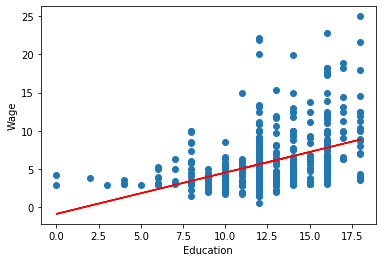

In [25]:
wage_hat = res.fittedvalues
plt.scatter('educ', 'wage', data=df)
plt.plot(df['educ'],wage_hat, 'r')
plt.xlabel('Education')
plt.ylabel('Wage')
pass

In [26]:
n = res.nobs
k = res.df_model
# n-k-1 = res.df_resid
SST = res.centered_tss
SSE = res.ess
SSR = res.ssr

In [27]:
res.rsquared

0.16475751099205138

In [28]:
1-SSR/SST

0.16475751099205138

In [29]:
u_hat = res.resid  # 残差
wage = df['wage']  # 被説明変数
R2 = 1 - np.var(u_hat) / np.var(wage)
R2

0.16475751099205127

In [30]:
res.rsquared_adj

0.16316353677638729

In [31]:
adjR2 = 1-(1-R2)*(n-1)/(n-k-1)
adjR2

0.16316353677638729

In [32]:
formula_1 = 'np.log(wage) ~ educ'

In [33]:
res_1 = ols(formula_1, data=df).fit()

In [34]:
res_1.params

Intercept    0.583773
educ         0.082744
dtype: float64

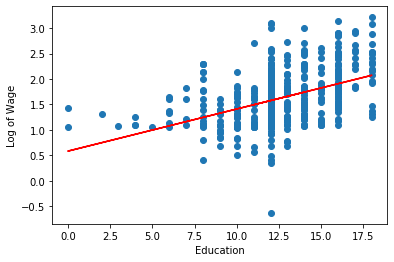

In [35]:
wage_log_hat_1 = res_1.fittedvalues
plt.scatter(df['educ'], np.log(df.loc[:,'wage']))
plt.plot(df['educ'], wage_log_hat_1, 'r')
plt.xlabel('Education')
plt.ylabel('Log of Wage')
pass

In [36]:
df['wage_log'] = np.log(df['wage'])

In [37]:
formula_2 = 'wage_log ~ educ'

In [38]:
res_2 = ols(formula_2, data=df).fit()

In [39]:
print(res_2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098


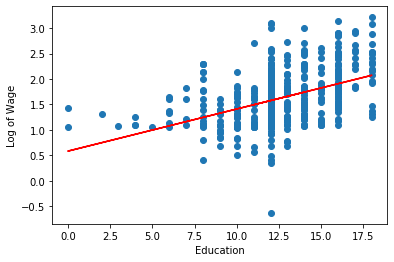

In [40]:
wage_log_hat_2 = res_2.fittedvalues
plt.scatter('educ', 'wage_log', data=df)
plt.plot(df['educ'], wage_log_hat_2, 'r')
plt.xlabel('Education')
plt.ylabel('Log of Wage')
pass

In [41]:
b0 = 1.0  # 定数項
b1 = 1.0  # 説明変数の係数
su = 1.0  # 誤差項の標準偏差

In [42]:
n = 30

In [43]:
x = norm.rvs(4, 1, size=n)
u = norm.rvs(0, su, size=n)
y = b0 + b1 * x + u

In [44]:
df_sim = pd.DataFrame({'X':x, 'Y':y})

In [45]:
formula = 'X ~ Y'
res_sim = ols(formula, data=df_sim).fit()

In [46]:
res_sim.params

Intercept    2.134374
Y            0.349665
dtype: float64

In [47]:
def my_sim(n,b0=1,b1=0.5,su=1):  # nを指定する，　他はデフォルトを設定
    
    x = norm.rvs(4, 1, size=n)
    u = norm.rvs(0, su, size=n)
    y = b0 + b1 * x + u
    
    df_sim = pd.DataFrame({'X':x, 'Y':y})
    
    formula = 'Y ~ X'
    res_sim = ols(formula, data=df_sim).fit()
    
    return res_sim.params

In [48]:
my_sim(100)

Intercept    1.079939
X            0.504118
dtype: float64

In [49]:
def my_sim_manual(n,b0=1,b1=0.5,su=1):  # nを指定する，　他はデフォルトを設定
    
    x = np.random.normal(loc=4, scale=1, size=n)
    u = np.random.normal(loc=0, scale=su, size=n)
    y = b0 + b1 * x + u
    
    var_cov = np.cov(y,x)  # 分散共分散行列
    cov_yx = var_cov[0,1]  # 共分散
    var_y = var_cov[0,0]  # yの分散
    var_x = var_cov[1,1]  # xの分散        
    avr_y = y.mean()      # yの平均
    avr_x = x.mean()      # xの平均
    
    b1hat = cov_yx / var_x  # スロープ係数        
    b0hat = avr_y - b1hat*avr_x  # 定数項
    
    return b0hat, b1hat  # 推定値

In [50]:
my_sim_manual(100)

(0.6748823253395626, 0.5281529374892341)

In [51]:
@njit
def my_sim_loop(n,N,b0=1.0,b1=1.0,su=1.0):  # nとN以外はデフォルトを指定
    
    b0hat_arr = np.zeros(N)  # OLS推定量を入れるarray（0がN個並んでいる）
    b1hat_arr = np.zeros(N)  # OLS推定量を入れるarray（0がN個並んでいる）
    
    c = np.ones(n)  # 定数項（1.がn個並んでいる）
    
    for i in range(N):  # N 回のループ
        
        x = np.random.normal(loc=4, scale=1.0, size=n)
        u = np.random.normal(loc=0, scale=1.0, size=n)
        y = b0 + b1 * x + u
      
        var_cov = np.cov(y,x)  # 分散共分散行列
        cov_yx = var_cov[0,1]  # 共分散
        var_y = var_cov[0,0]  # yの分散
        var_x = var_cov[1,1]  # xの分散        
        avr_y = y.mean()      # yの平均
        avr_x = x.mean()      # xの平均
        
        b1hat = cov_yx / var_x  # スロープ係数の推定値
        b0hat = avr_y - b1hat*avr_x  # 定数項の推定値

        b0hat_arr[i] = b0hat  # i番目に定数項の推定値をarrに追加
        b1hat_arr[i] = b1hat  # i番目にスロープ係数の推定値をarrに追加
        
    return b0hat_arr, b1hat_arr  # N回ループ終了後にarrayをタプルとして返すオブジェクト

In [52]:
N=100_000

In [53]:
b0hat, b1hat = my_sim_loop(50,N)

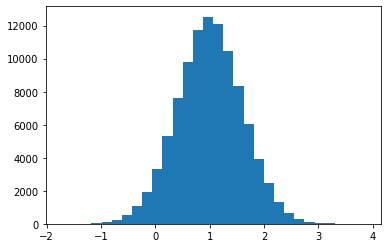

In [54]:
plt.hist(b0hat,bins=30)
pass

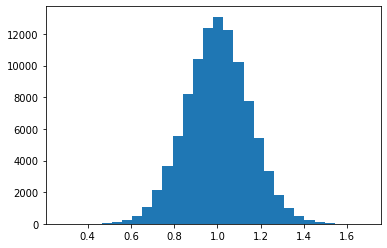

In [55]:
plt.hist(b1hat,bins=30)
pass

In [56]:
r = 1000

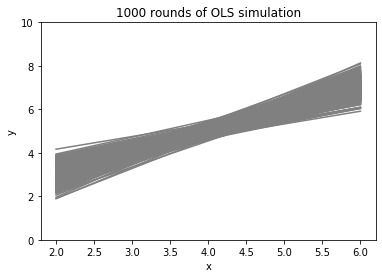

In [57]:
xx = np.linspace(2,6,50)

for i in range(r):  # r回のループで図示
    yhat = b0hat[i] + b1hat[i]*xx  # yの予測値
    plt.plot(xx, yhat, 'grey')  # yの予測値を図示
    
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,10) # 縦軸の表示範囲を設定
plt.title(f'{r} rounds of OLS simulation')
pass